# BDINF project SS2024

## Topic

The main goal is to check if there is a correlation between CO2 emissions and between new/used registered cars in AT (since 200). It would be also good to know how the CO2 emission did reduce over time for newly registered cars as a percentage.

Members: Grégoire Bartek, Matthias Huber, David Berger

## Data Sources: 

Planned Data Source: It is planned to store the data in a MYSQL database. The data from newly registered cars and used regeistered cars will be stored in a seperate tables and the emission data will be stored in a third table, we are currently in the process finding good APIs.

AT new registered cars: https://www.data.gv.at/katalog/de/dataset/stat_pkw-neuzulassungen-nach-marken-ab-janner-2000#resources

AT used registered cars: https://www.data.gv.at/katalog/dataset/6fc1c927-bf21-3d72-9333-a9055493ab3c#additional-info

emission data: https://www.data.gv.at/katalog/dataset/bd462a04-2453-4c76-95bb-cfbd043540f5#resources (trendbericht nach sektoren)



# Load the data from the CSV file


## Planned procedure : 

MYSQL DB is running in a docker container, which will be versioned in the following Github repository (This is accomplished because we want to save Azure credits):

https://github.com/huhubi/BDINF_project

The queries will be made from this notebook, so the outcome is reproducable

## Expected Output :

The data will be visualized and described in this notebook, it is expected to find a correlation between lower emissions and the production year of cars

# Documentation of procedure

First, we are downloading the csv data and doing explorative data analysis from AT emissions to check which categories are fitting for the car data. Since the data is from the years 1990-2022, and the car data is from 2000, just the emissions from 2000 are being considered. We also transformed the csv file to a xlsx file so we dont get any encoding issue

First, we get the CO2 data from the emissions csv. Here we are looking at the line 33, which has the yearly CO2 data from transport. Now we write us a script which gets just the line we want (in our case line 33, for transport)

In [33]:
import pandas as pd

# TODO: 2 Eintrag entfernen

# Load the Excel file
file_path = 'emissions/schadstoffemissionen_1990-2022_nach_trendbericht-sektoren_wide.xlsx'  # Update this to your actual file path
data = pd.read_excel(file_path)

# Select only the specified lines (Python uses 0-based indexing)
filtered_data = data.iloc[[0, 32]]  # Adjusted for 0-based index: 1-1=0 and 33-1=32

# Save the filtered data to a new Excel file with the correct extension
filtered_data.to_excel('emissions/emissions_result.xlsx', index=False)

we need a little bit more cleanup

In [49]:


# Specify the path to the Excel file
file_path = 'emissions/emissions_result.xlsx'  # Adjust this to the correct path

# Read the Excel file
data = pd.read_excel(file_path)

# Extract the second row (which contains the CO data)
co_data = data.iloc[[1]]

# Specify the path to save the new Excel file containing only the CO data
output_path = 'emissions/co_emissions.xlsx'  # Adjust this to your desired path

# Save the CO data to the new Excel file
co_data.to_excel(output_path, index=False)

one more....

In [50]:
import pandas as pd

# Load the excel file
excel_path = 'emissions/co_emissions.xlsx'
data = pd.read_excel(excel_path)

# Define the function to check if a column name represents a year up to 2023
def is_year_col(col):
    try:
        year = int(col)
        return year <= 2023
    except ValueError:
        # The column name is not a year
        return False

# Keep only the columns that are years up to and including 2023
cols_to_keep = [col for col in data.columns if is_year_col(col)]
cleaned_data = data[cols_to_keep]

# Save the cleaned data to a new excel file
cleaned_excel_path = 'emissions/cleaned_co_emissions.xlsx'
cleaned_data.to_excel(cleaned_excel_path, index=False)

print(cleaned_data)

          1990         1991         1992         1993         1994  \
0  393630.9085  430816.0475  396309.5863  382110.1478  350767.5162   

          1995         1996         1997         1998         1999  ...  \
0  363766.9714  381670.5571  343219.8317  326173.3633  322593.8883  ...   

          2014         2015         2016         2017         2018  \
0  237697.3519  242982.9094  246182.9875  246088.5924  223550.7482   

          2019         2020         2021         2022  2023  
0  224370.5441  222961.9751  260701.7734  210604.1041   NaN  

[1 rows x 34 columns]


now we can vizualize the data

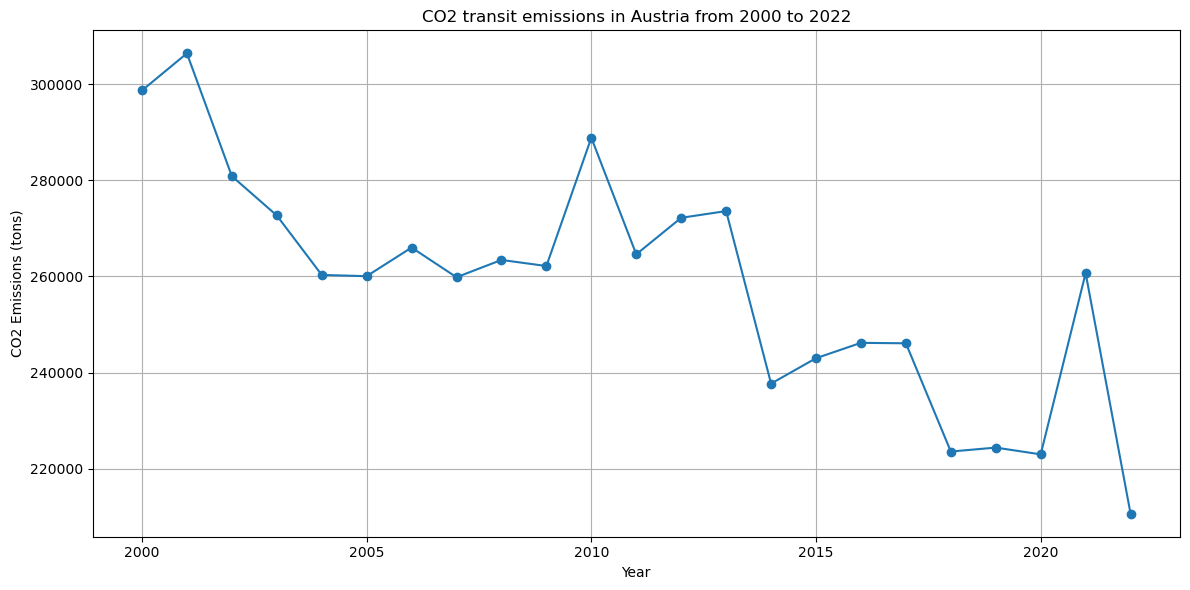

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
cleaned_data_path = 'emissions/cleaned_co_emissions.xlsx'  # Replace with the correct path to the cleaned data
cleaned_data = pd.read_excel(cleaned_data_path)

# Filter the data for the years 2000 to 2022
years = list(range(2000, 2023))  # The correct column names are integers
austria_co2 = cleaned_data[years].transpose()

# Rename the index and columns for clarity
austria_co2.index.name = 'Year'
austria_co2.columns = ['CO2 Emissions']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(austria_co2.index, austria_co2['CO2 Emissions'], marker='o')
plt.title('CO2 transit emissions in Austria from 2000 to 2022')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
graph_path = 'emissions/austria_co2_emissions_2000_2022.png'  # Replace with your desired file path
plt.savefig(graph_path)

plt.show()

# New vehicles

C-J59-0 --> Passenger car names

C-A10-0 --> Time (monthly values)

C-EK7-0 --> vehicle type

F-ISIS-1 --> count


# Used vehicles

C-J59-0 --> Passenger car names

C-A10-0 --> Time (monthly values)

C-EK7-0 --> vehicle type

F-ISIS-1 --> count


### TODO: merge data

Count von new registered und used cars pro Jahr gegenüberstellen mit emissions